# **Preliminaries**

Write requirements to file, anytime you run it, in case you have to go back and recover dependencies.

Latest known such requirements are hosted for each notebook in the companion github repo, and can be pulled down and installed here if needed. Companion github repo is located at https://github.com/azunre/transfer-learning-for-nlp

In [1]:

!pip freeze > kaggle_image_requirements.txt

# Read and Preprocess Enron dataset

Read Enron dataset and get a sense for the data by printing sample messages to screen

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
filepath = "../input/enron-email-dataset/emails.csv"

# Read the enron data into a pandas.DataFrame called emails
emails = pd.read_csv(filepath)

print("Successfully loaded {} rows and {} columns!".format(emails.shape[0], emails.shape[1]))
print(emails.head())

Successfully loaded 517401 rows and 2 columns!
                       file                                            message
0     allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...
1    allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...
2   allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...
3  allen-p/_sent_mail/1000.  Message-ID: <13505866.1075863688222.JavaMail.e...
4  allen-p/_sent_mail/1001.  Message-ID: <30922949.1075863688243.JavaMail.e...


In [3]:
# take a closer look at the first email
print(emails.loc[0]["message"])

Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 


Separate headers from the message bodies

In [4]:
import email

def extract_messages(df):
    messages = []
    for item in df["message"]:
        # Return a message object structure from a string
        e = email.message_from_string(item)    
        # get message body  
        message_body = e.get_payload()
        messages.append(message_body)
    print("Successfully retrieved message body from e-mails!")
    return messages

bodies = extract_messages(emails)

Successfully retrieved message body from e-mails!


In [5]:
# extract random 10000 enron email bodies for building dataset
import random
bodies_df = pd.DataFrame(random.sample(bodies, 10000))

# expand default pandas display options to make emails more clearly visible when printed
pd.set_option('display.max_colwidth', 300)

bodies_df.head() # you could do print(bodies_df.head()), but Jupyter displays this nicer for pandas DataFrames

,0
0,Louise\n \nHope all is well. You can reach me by phone or email. Feel free to bug me.\n \nEES Wholesale may make our budget this quarter.\n \nJohn
1,"At the request of Dave Forster, I am attaching our proposed form of \nNon-Disclosure Agreement. If the enclosed meets with your approval, please \nexecute the agreement and return it to me via fax no. (713) 646-3490. I will \nthen have it executed by Enron. If you have any comments or questi..."
2,"\nThe Commission held a meeting today and issued the following news releases:\n\nCOMMISSION TO STUDY CAPACITY RESERVE CHANGES\n\n\n \n\n COMMISSION OUTLINES FUTURE DIRECTIONS,\n EXPLAINS STRATEGY FOR MAKING MARKETS WORK \n\n \n\nCOMMISSION PROPOSES STRENGTHENING STANDARDS OF CO..."
3,"pls print and hand to me. DF \n---------------------- Forwarded by Drew Fossum/ET&S/Enron on 10/18/2000 \n10:25 AM ---------------------------\n \n\t\n\t\n\tFrom: Gary Zahn 10/18/2000 09:54 AM\n\t\n\nTo: Keith Petersen/ET&S/Enron@ENRON, Ray Smith/ET&S/Enron@ENRON, ..."
4,Thank you for your request. You will be notified by email when your request has been processed. You can check the progress of your request by clicking http://itcapps.corp.enron.com/srrs/auth/emailLink.asp?ID=000000000030633&Page=MyReq.\n\n\n


The following (commented out) code is arguably the more "pythonic" way of achieving the extraction of bodies from messages. It is only 2 lines long and achieves the same result. However, we feel the code above is more transparent with regards to how the processing is carried out, and as such leave this here for the python experts if they prefer.

In [6]:
#messages = emails["message"].apply(email.message_from_string)
#bodies_df = messages.apply(lambda x: x.get_payload()).sample(10000)

# Read and Preprocess Fraudulent "419" Email Corpus

In [7]:
filepath = "../input/fraudulent-email-corpus/fradulent_emails.txt"
with open(filepath, 'r',encoding="latin1") as file:
    data = file.read()

Print the first 20000 characters of read file string (this gives only a few emails), and notice the keyword `From r` close to the beginning of each email header

In [8]:
print(data[:20000])

From r  Wed Oct 30 21:41:56 2002
Return-Path: <james_ngola2002@maktoob.com>
X-Sieve: cmu-sieve 2.0
Return-Path: <james_ngola2002@maktoob.com>
Message-Id: <200210310241.g9V2fNm6028281@cs.CU>
From: "MR. JAMES NGOLA." <james_ngola2002@maktoob.com>
Reply-To: james_ngola2002@maktoob.com
To: webmaster@aclweb.org
Date: Thu, 31 Oct 2002 02:38:20 +0000
Subject: URGENT BUSINESS ASSISTANCE AND PARTNERSHIP
X-Mailer: Microsoft Outlook Express 5.00.2919.6900 DM
MIME-Version: 1.0
Content-Type: text/plain; charset="us-ascii"
Content-Transfer-Encoding: 8bit
X-MIME-Autoconverted: from quoted-printable to 8bit by sideshowmel.si.UM id g9V2foW24311
Status: O

FROM:MR. JAMES NGOLA.
CONFIDENTIAL TEL: 233-27-587908.
E-MAIL: (james_ngola2002@maktoob.com).

URGENT BUSINESS ASSISTANCE AND PARTNERSHIP.


DEAR FRIEND,

I AM ( DR.) JAMES NGOLA, THE PERSONAL ASSISTANCE TO THE LATE CONGOLESE (PRESIDENT LAURENT KABILA) WHO WAS ASSASSINATED BY HIS BODY GUARD ON 16TH JAN. 2001.


THE INCIDENT OCCURRED IN OUR PRESENCE WH

Split on the code word `From r` appearing close to the beginning of each email

In [9]:
fraud_emails = data.split("From r")

print("Successfully loaded {} spam emails!".format(len(fraud_emails)))

Successfully loaded 3978 spam emails!


In [10]:
fraud_bodies = extract_messages(pd.DataFrame(fraud_emails,columns=["message"],dtype=str))
fraud_bodies_df = pd.DataFrame(fraud_bodies[1:])

fraud_bodies_df.head() # you could do print(fraud_bodies_df.head()), but Jupyter displays this nicer for pandas DataFrames

Successfully retrieved message body from e-mails!


,0
0,"FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-27-587908.\nE-MAIL: (james_ngola2002@maktoob.com).\n\nURGENT BUSINESS ASSISTANCE AND PARTNERSHIP.\n\n\nDEAR FRIEND,\n\nI AM ( DR.) JAMES NGOLA, THE PERSONAL ASSISTANCE TO THE LATE CONGOLESE (PRESIDENT LAURENT KABILA) WHO WAS ASSASSINATED BY HIS BODY G..."
1,"Dear Friend,\n\nI am Mr. Ben Suleman a custom officer and work as Assistant controller of the Customs and Excise department Of the Federal Ministry of Internal Affairs stationed at the Murtala Mohammed International Airport, Ikeja, Lagos-Nigeria.\n\nAfter the sudden death of the former Head of s..."
2,"FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF ELEME KINGDOM \nCHIEF DANIEL ELEME, PHD, EZE 1 OF ELEME.E-MAIL \nADDRESS:obong_715@epatra.com \n\nATTENTION:PRESIDENT,CEO Sir/ Madam. \n\nThis letter might surprise you because we have met\nneither in person nor by correspondence. But I believe\nit is..."
3,"FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF ELEME KINGDOM \nCHIEF DANIEL ELEME, PHD, EZE 1 OF ELEME.E-MAIL \nADDRESS:obong_715@epatra.com \n\nATTENTION:PRESIDENT,CEO Sir/ Madam. \n\nThis letter might surprise you because we have met\nneither in person nor by correspondence. But I believe\nit is..."
4,"Dear sir, \n \nIt is with a heart full of hope that I write to seek your help in respect of the context below. I am Mrs. Maryam Abacha the former first lady of the former Military Head of State of Nigeria General Sani Abacha whose sudden death occurred on 8th of June 1998 as a result of cardiac ..."


# Define Tokenization, Stop-word and Punctuation Removal Functions 

Before proceeding, we must decide how many samples to draw from each class. We must also decide the maximum number of tokens per email, and the maximum length of each token. This is done by setting the following overarching hyperparameters

In [11]:
Nsamp = 1000 # number of samples to generate in each class - 'spam', 'not spam'
maxtokens = 200 # the maximum number of tokens per document
maxtokenlen = 100 # the maximum length of each token

**Tokenization**

In [12]:
def tokenize(row):
    if row is None or row is '':
        tokens = ""
    else:
        tokens = str(row).split(" ")[:maxtokens]
    return tokens

**Use regular expressions to remove unnecessary characters** 

Next, we define a function to remove punctuation marks and other nonword characters (using regular expressions) from the emails with the help of the ubiquitous python regex library. In the same step, we truncate all tokens to hyperparameter `maxtokenlen` defined above.

In [13]:
import re

def reg_expressions(row):
    tokens = []
    try:
        for token in row:
            token = token.lower() # make all characters lower case
            token = re.sub(r'[\W\d]', "", token)
            token = token[:maxtokenlen] # truncate token
            tokens.append(token)
    except:
        token = ""
        tokens.append(token)
    return tokens

**Stop-word removal**

Let’s define a function to remove stopwords - words that occur so frequently in language that they offer no useful information for classification. This includes words such as “the” and “are”, and the popular library NLTK provides a heavily-used list that will employ.

In [14]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')    

def stop_word_removal(row):
    token = [token for token in row if token not in stopwords]
    token = filter(None, token)
    return token

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Bag-of-words model 

For the computer to make inferences of the e-mails, it has to be able to interpret the text by making a numerical representation of it. One way to do this is by using something called a "bag-of-words" model. This model simply counts the frequency of word tokens for each email and thereby represents it as a vector of these counts.

**Assemble matrices function** 

The `assemble_bag()` function assembles a new dataframe containing all the unique words found in the text documents. It counts the word frequency and then returns the new dataframe.

In [15]:
def assemble_bag(data):
    used_tokens = []
    all_tokens = []

    for item in data:
        for token in item:
            if token in all_tokens:
                if token not in used_tokens:
                    used_tokens.append(token)
            else:
                all_tokens.append(token)
    
    df = pd.DataFrame(0, index = np.arange(len(data)), columns = used_tokens)
    
    for i, item in enumerate(data):
        for token in item:
            if token in used_tokens:
                df.iloc[i][token] += 1    
    return df

# Putting It All Together To Assemble Dataset

Now, putting all the preprocessing steps together we assemble our dataset...

In [16]:
# Convert everything to lower-case, truncate to maxtokens and truncate each token to maxtokenlen
EnronEmails = bodies_df.iloc[:,0].apply(tokenize)
EnronEmails = EnronEmails.apply(stop_word_removal)
EnronEmails = EnronEmails.apply(reg_expressions)
EnronEmails = EnronEmails.sample(Nsamp)

SpamEmails = fraud_bodies_df.iloc[:,0].apply(tokenize)
SpamEmails = SpamEmails.apply(stop_word_removal)
SpamEmails = SpamEmails.apply(reg_expressions)
SpamEmails = SpamEmails.sample(Nsamp)

raw_data = pd.concat([SpamEmails,EnronEmails], axis=0).values

In [17]:
print("Shape of combined data is:")
print(raw_data.shape)
print("Data is:")
print(raw_data)

# create corresponding labels
Categories = ['spam','notspam']
header = ([1]*Nsamp)
header.extend(([0]*Nsamp))

Shape of combined data is:
(2000,)
Data is:
[list(['from', 'dr', 'kola', 'devisattn', 'sir', 'it', 'is', 'my', 'pleasure', 'writing', 'you', 'this', 'mailand', 'i', 'hope', 'that', 'you', 'are', 'somebody', 'i', 'will', 'trust', 'for', 'this', 'transaction', 'hence', 'it', 'is', 'confidential', 'as', 'a', 'matter', 'of', 'facti', 'am', 'civil', 'servant', 'working', 'with', 'the', 'nigeria', 'national', 'petroleum', 'corporation', 'nnpcalsoi', 'am', 'the', 'chairman', 'contract', 'payment', 'release', 'review', 'committedue', 'to', 'the', 'manipulations', 'of', 'contract', 'award', 'in', 'the', 'corporations', 'ten', 'years', 'ago', 'till', 'date', 'by', 'the', 'past', 'and', 'present', 'military', 'and', 'civilian', 'governemnt', 'officialsthis', 'committe', 'is', 'legally', 'mandated', 'by', 'the', 'three', 'organ', 'of', 'the', 'government', 'to', 'review', 'all', 'the', 'contract', 'awarded', 'for', 'immediate', 'payment', 'during', 'this', 'excerisethis', 'committe', 'discovered',

We are now ready to convert these into numerical vectors!!

**Featurize and Create Labels**

In [18]:
# create bag-of-words model
EnronSpamBag = assemble_bag(raw_data)
# this is the list of words in our bag-of-words model
predictors = [column for column in EnronSpamBag.columns]
EnronSpamBag # display the model for the user

,you,i,this,it,is,am,the,of,contract,and,...,lagrasta,unchanged,whitt,redmond,luce,optimization,dynegy,coastal,valero,recognition
0,2,2,4,2,3,2,12,5,6,4,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,3,0,0,0,2,0,0,0,...,1,1,1,1,1,1,0,0,0,0
1998,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0


In [19]:
# shuffle raw data first
def unison_shuffle_data(data, header):
    p = np.random.permutation(len(header))
    data = data[p,:]
    header = np.asarray(header)[p]
    return data, header
data, header = unison_shuffle_data(EnronSpamBag.values, header)

# split into independent 70% training and 30% testing sets
idx = int(0.7*data.shape[0])

# 70% of data for training
train_x = data[:idx,:]
train_y = header[:idx]
# # remaining 30% for testing
test_x = data[idx:,:]
test_y = header[idx:] 

print("train_x/train_y list details, to make sure they are of the right form:")
print(len(train_x))
print(train_x)
print(train_y[:5])
print(len(train_y))

train_x/train_y list details, to make sure they are of the right form:
1400
[[ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  1  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]]
[0 0 1 0 1]
1400


Since 70% of 2000 is 1400, looks good! (for Nsamp=1000)

Onwards!

# Logistic Regression Classifier

In [20]:
from sklearn.linear_model import LogisticRegression

def fit(train_x,train_y):
    model = LogisticRegression()

    try:
        model.fit(train_x, train_y)
    except:
        pass
    return model

model = fit(train_x,train_y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
predicted_labels = model.predict(test_x)

# print all labels for full trasparency
print("DEBUG::The logistic regression predicted labels are::")
print(predicted_labels)

DEBUG::The logistic regression predicted labels are::
[1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0
 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0
 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0
 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0
 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0
 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0
 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0
 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1
 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1
 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0

In [22]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(test_y, predicted_labels)

print("DEBUG::The logistic regression accuracy score is::")
print(acc_score)

DEBUG::The logistic regression accuracy score is::
0.9933333333333333


# Support Vector Machine Classifier

In [23]:
import time
from sklearn.svm import SVC # Support Vector Classification model

In [24]:
# Create a support vector classifier
clf = SVC(C=1, gamma="auto", probability=True)

# Fit the classifier using the training data
start_time = time.time()
clf.fit(train_x, train_y)
end_time = time.time()
print("Training the SVC Classifier took %3d seconds"%(end_time-start_time))

predicted_labels = clf.predict(test_x)
print("DEBUG::The SVC Classifier predicted labels are::")
print(predicted_labels)

acc_score = accuracy_score(test_y, predicted_labels)

print("DEBUG::The SVC Classifier accuracy score is::")
print(acc_score)

Training the SVC Classifier took 120 seconds
DEBUG::The SVC Classifier predicted labels are::
[1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0
 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0
 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0
 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1
 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0
 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0
 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0
 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1
 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1
 0 0 0

# Random Forests

In [25]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=1, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (spam, not spam?)
start_time = time.time()
clf.fit(train_x, train_y)
end_time = time.time()
print("Training the Random Forest Classifier took %3d seconds"%(end_time-start_time))

predicted_labels = clf.predict(test_x)
print("DEBUG::The RF predicted labels are::")
print(predicted_labels)

acc_score = accuracy_score(test_y, predicted_labels)

print("DEBUG::The RF testing accuracy score is::")
print(acc_score)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training the Random Forest Classifier took   0 seconds
DEBUG::The RF predicted labels are::
[1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0
 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0
 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0
 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0
 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0
 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0
 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0
 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1
 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1
 0 1 0 1

In [26]:
# Now, tune parameters systematically
from sklearn.model_selection import GridSearchCV

print("Available hyper-parameters for systematic tuning available with RF:")
print(clf.get_params())

# select a subset of parameters to tune, and specify grid for each
param_grid = {
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 6, 10],
    'n_estimators': [10, 100, 1000]
}
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(train_x, train_y)

print("Best parameters found:")
print(grid_search.best_params_)

print("Estimated accuracy is:")
acc_score = accuracy_score(test_y, grid_search.best_estimator_.predict(test_x))
print(acc_score)

Available hyper-parameters for systematic tuning available with RF:
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': 1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  3.3min finished


Best parameters found:
{'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Estimated accuracy is:
0.9916666666666667


# Gradient Boosting Machines

In [27]:
from sklearn.ensemble import GradientBoostingClassifier  # GBM algorithm
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import cross_val_score, GridSearchCV

def modelfit(alg, train_x, train_y, predictors, test_x, performCV=True, printFeatureImportance=False, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(train_x, train_y)
        
    #Predict training set:
    predictions = alg.predict(train_x)
    predprob = alg.predict_proba(train_x)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, train_x, train_y, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(train_y,predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(train_y, predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp[:10].plot(kind='bar', title='Feature Importances')
        
    return alg.predict(test_x),alg.predict_proba(test_x)
        
gbm0 = GradientBoostingClassifier(random_state=10)

start_time = time.time()
test_predictions, test_probs = modelfit(gbm0, train_x, train_y, predictors, test_x)
end_time = time.time()

print("Training the Gradient Boosting Classifier took %3d seconds"%(end_time-start_time))

predicted_labels = test_predictions
print("DEBUG::The Gradient Boosting predicted labels are::")
print(predicted_labels)

acc_score = accuracy_score(test_y, predicted_labels)

print("DEBUG::The Gradient Boosting testing accuracy score is::")
print(acc_score)


Model Report
Accuracy : 0.9979
AUC Score (Train): 0.998800
CV Score : Mean - 0.9962112 | Std - 0.002685148 | Min - 0.9927806 | Max - 0.9990236
Training the Gradient Boosting Classifier took 409 seconds
DEBUG::The Gradient Boosting predicted labels are::
[1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0
 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0
 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0
 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1
 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0
 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0
 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0

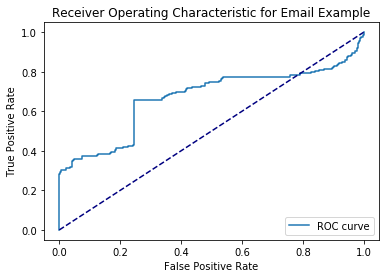

In [28]:
# Make an ROC curve
test_probs_max = [] # first need to find probabilities corresponding
                    # to most likely class (max probability)
for i in range(test_probs.shape[0]):
    test_probs_max.append(test_probs[i,test_y[i]])
len(test_probs_max)

# now, generate the curve data
fpr, tpr, thresholds = metrics.roc_curve(test_y, np.array(test_probs_max))

# plot curve data
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
plt.plot(fpr,tpr,label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Email Example')
plt.legend(loc="lower right")
plt.show()

Now, save the image and make it downloadable, so you can use it in local documents

In [29]:
fig.savefig('ROC.eps', format='eps',bbox_inches='tight')
fig.savefig('ROC.pdf', format='pdf',bbox_inches='tight')
fig.savefig('ROC.png', format='png',bbox_inches='tight')
fig.savefig('ROC.svg', format='svg',bbox_inches='tight')

In [30]:
# Save .svg of ROC
from IPython.display import HTML
def create_download_link(title = "Download file", filename = "ROC.svg"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

create_download_link(filename='ROC.svg')